# Análise Exploratória

### Automóveis
<br>

Por Jander Guimarães

LinkedIn: https://www.linkedin.com/in/janderfg/<br>
Github: https://github.com/janderfg

![title](https://github.com/janderfg/EAD-Exploratory_Data_Analysis/blob/master/images/car.jpg?raw=true)

<br>



A `Análise Exploratória` é uma das etapas mais importantes, tanto para Analistas de Dados, quanto para Cientista de Dados.
Nesta etapa visualizamos como nossos dados estão distribuídos, se existem valores faltantes, se existem valores discrepantes (outliers), buscamos validar se os dados "fazem sentido". É através desta etapa que já podemos tirar alguns insights ou prepararmos para algoritmos de Machine Learning se necessário.

É importante conhecermos sobre a área de negócio que estamos analisando. Quando isto não for possível, vale a pesquisa em livros, internet, artigos e principalmente com as pessoas do negócio, ou seja, com aqueles que estão no dia a dia.

Com este objetivo, desenvolvi este trabalho.

**Importando as bibliotecas necessárias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Configurações para o Jupyter Notebook exibir ou não todas as linhas e colunas**

In [2]:
# Permite visualizar todas as colunas
pd.set_option('display.max_columns', None)

# Permite visualizar todas as linhas
# pd.set_option('display.max_rows', None)

### Dataset:

https://archive.ics.uci.edu/ml/datasets/Automobile

Data Set Information:

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

In [3]:
# Endereço do dataset (conjunto de dados)
# De modo alternativo é possível 
url='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

Informações sobre as variáveis


**Attributes/Features/Características:**

- 1. **symboling:** -3, -2, -1, 0, 1, 2, 3;
- 2. **normalized-losses:** continuous from 65 to 256;
- 3. **make:** alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo;
- 4. **fuel-type:** diesel, gas;
- 5. **aspiration:** std (standard), turbo (turbocharge);
- 6. **num-of-doors:** four, two;
- 7. **body-style:** hardtop, wagon, sedan, hatchback, convertible; (Tipo de Carroceria)
- 8. **drive-wheels:** 4wd (four wheel drive - Tração nas 4 rodas), fwd (front wheel drive - Tração Dianteira), rwd (rear wheel drive - Tração Traseira);
- 9. **engine-location:** front, rear;
- 10. **wheel-base:** continuous from 86.6 120.9;
- 11. **length:** continuous from 141.1 to 208.1;
- 12. **width:** continuous from 60.3 to 72.3;
- 13. **height:** continuous from 47.8 to 59.8;
- 14. **curb-weight:** continuous from 1488 to 4066. The weight of an automobile without occupants or baggage.
- 15. **engine-type:** dohc, dohcv, l, ohc, ohcf, ohcv, rotor;
- 16. **num-of-cylinders:** eight, five, four, six, three, twelve, two;
- 17. **engine-size:** continuous from 61 to 326;
- 18. **fuel-system:** 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi;
- 19. **bore:** continuous from 2.54 to 3.94. An engine's bore is the diameter of each cylinder.
- 20. **stroke:** continuous from 2.07 to 4.17. The stroke is the distance within the cylinder the piston travels.
- 21. **compression-ratio:** continuous from 7 to 23;
- 22. **horsepower:** continuous from 48 to 288;
- 23. **peak-rpm:** continuous from 4150 to 6600;
- 24. **city-mpg:** continuous from 13 to 49. This measured refers to driving with occasional stopping and braking, simulating the conditions you're likely to run into while driving on city streets.
- 25. **highway-mpg:** continuous from 16 to 54. This measured is based on more continuous acceleration, which usually yields a higher figure because it's a more efficient use of the engine.
- 26. **price:** continuous from 5118 to 45400.

In [4]:
# Nomes das colunas
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', \
'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', \
'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', \
'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

**Carregando o conjunto de dados**

In [5]:
df=pd.read_csv(url, header=None, names=cols)

In [6]:
# Visualizando as 5 primeiras linhas/observações
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Como podemos ver acima, temos variável com sinal de interrogação "`?`"**<br>
**Iremos alterar para `NaN` (valores faltantes)**

In [7]:
df.replace('?', np.nan, inplace=True)

**Agora podemos visualizar que os valores `?` foram alterados para `NaN` (valores faltantes)**

In [8]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Checando por valores faltantes**

In [9]:
df.isnull().sum().sort_values(ascending=False)

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          2
length                0
make                  0
fuel-type             0
aspiration            0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
height                0
width                 0
highway-mpg           0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
compression-ratio     0
city-mpg              0
symboling             0
dtype: int64

**Checando valores únicos para a variável `num-of-cylinders` (número de cilindros)**

Podemos ver abaixo que existe apenas 4 instâncias de carros com 2 cilindros e apenas 1 com 12 cilindros, porém existem valores faltantes na linha, sendo que após a remoção dos valores faltantes `NaN`, poderemos ver que veículos com `2` e `12` cilindros serão removidos.

In [10]:
df[(df['num-of-cylinders']=='two') | (df['num-of-cylinders']=='twelve')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
49,0,NaN,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645


**Removendo as colunas com dados faltantes**

Neste caso a variável `normalized-losses` é a que mais tem valores faltantes, porém essa variável não é relevante para nossa `Análise Exploratória`.

Já o restante das variáveis com valores faltantes, são poucas o que não prejudica nossa análise.

Note que geralmente, quando são poucas as linhas/observações com valores faltantes, é mais prático eliminar a linha como um todo.

Importante destacar que nem sempre esta abordagem é a melhor, e dependendo do projeto é melhor utilizar outras técnicas, como imputação, seja através da média, mediana ou métodos mais avançados como "fillna" ou algoritmos de Machine Learning.

In [11]:
df.dropna(inplace=True)

# Feature Engineering

Feature engineering é um processo de utilizar o conhecimento de negócio para extrair novas informações do conjunto de dados. Esta técnica tem como objetivo nos ajudar a aprofundar nos dados, obter insights e também é muito utilizado para melhorar a performance de modelo de Machine Learning.

Como podemos ver, a variável `num-of-cylinders` está como string, iremos converter para número para nos ajudar a trabalhar com os números. Também iremos criar uma nova coluna (variável) com o valor médio das variáveis `highway-mpg` e `city-mpg` para termos uma média do consumo em geral, ou seja, considerando o consumo na cidade e na estrada.

**Convertendo a coluna `price` e `horsepower` para o tipo numérico.**

In [12]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

**Convertendo a coluna `num-of-cylinders` para o tipo numérico.**

In [13]:
df['num-of-cylinders'] = df['num-of-cylinders'].map({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    object 
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    int64  
 16  engine-size        159 non

**Criando uma nova coluna com a média de consumo (cidade e estrada)**

In [15]:
# "25" é o índice da coluna, ou seja, irei inserir logo após a coluna "highway-mpg"
# Se não fosse utilizado esta função "insert" a coluna nova seria inserido na última posição, após "price"
df.insert(25, 'avg-mpg', df[['city-mpg','highway-mpg']].mean(axis=1))

**Visualizando abaixo a nova coluna (variável) criada, que é a média do consumo da cidade e da estrada.**

In [16]:
df[['city-mpg','highway-mpg', 'avg-mpg']].head()

,city-mpg,highway-mpg,avg-mpg
3,24,30,27.0
4,18,22,20.0
6,19,25,22.0
8,17,20,18.5
10,23,29,26.0


# Análise Exploratória

**Checando algumas estatísticas iniciais**

In [17]:
df.describe().round(2)

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,avg-mpg,price
count,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00
mean,0.74,98.26,172.41,65.61,53.90,2461.14,4.24,119.23,10.16,95.84,26.52,32.08,29.30,11445.73
std,1.19,5.17,11.52,1.95,2.27,481.94,0.67,30.46,3.89,30.72,6.10,6.46,6.23,5877.86
min,-2.00,86.60,141.10,60.30,49.40,1488.00,3.00,61.00,7.00,48.00,15.00,18.00,17.00,5118.00
25%,0.00,94.50,165.65,64.00,52.25,2065.50,4.00,97.00,8.70,69.00,23.00,28.00,25.00,7372.00
50%,1.00,96.90,172.40,65.40,54.10,2340.00,4.00,110.00,9.00,88.00,26.00,32.00,29.00,9233.00
75%,2.00,100.80,177.80,66.50,55.50,2809.50,4.00,135.00,9.40,114.00,31.00,37.00,34.00,14719.50
max,3.00,115.60,202.60,71.70,59.80,4066.00,8.00,258.00,23.00,200.00,49.00,54.00,51.50,35056.00


**Verificando a média de preços dos automóveis**

In [18]:
df['price'].mean()

11445.729559748428

**Visualizando um boxplot referente à variável `price` (preço) do automóvel.**

Como podemos ver, existem alguns veículos com valores muito acima da média.

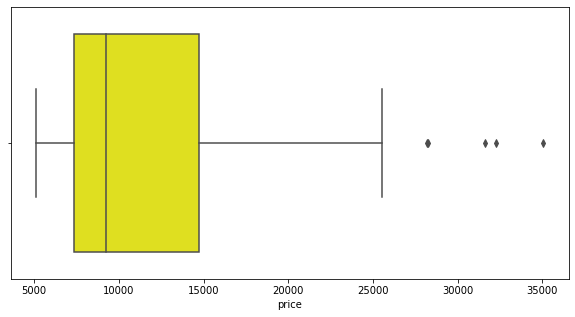

In [19]:
plt.figure(figsize=(10,5))
fig = sns.boxplot(df['price'], orient="h", color='yellow')

**Iremos visualizar agora quais são os veículos mais caros em nosso dataset.**

Como podemos ver, os veículos abaixo estão com valores muito acima da média que é de 11445

In [20]:
df1 = df[['make','price']]
print(df1.nlargest(4, 'price'))

             make  price
72  mercedes-benz  35056
47         jaguar  32250
70  mercedes-benz  31600
68  mercedes-benz  28248


### Visualizando a Distribuição dos Preços

Podemos ver que a maior concentração é de 5.000 a 24.000

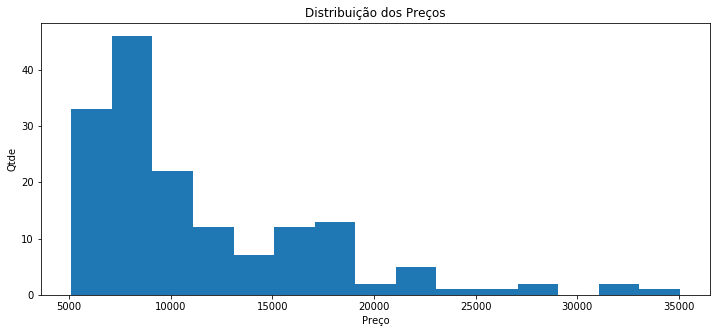

In [21]:
plt.figure(figsize=(12,5))
plt.hist(df["price"],bins=15)
plt.title("Distribuição dos Preços")
plt.xlabel("Preço")
plt.ylabel("Qtde")
plt.show()

Como podemos ver no gráfico abaixo, temos em nosso conjunto de dados mais veículos da Toyota, seguido pela Nissan e Mazda.

O que chama atenção é a quantidade de carros japoneses no conjunto de dados, o que nos levaria a buscar maiores informações a respeito, já que as 5 primeiras são japonesas (Toyota, Nissan, Mazda, Honda, Mitsubishi).

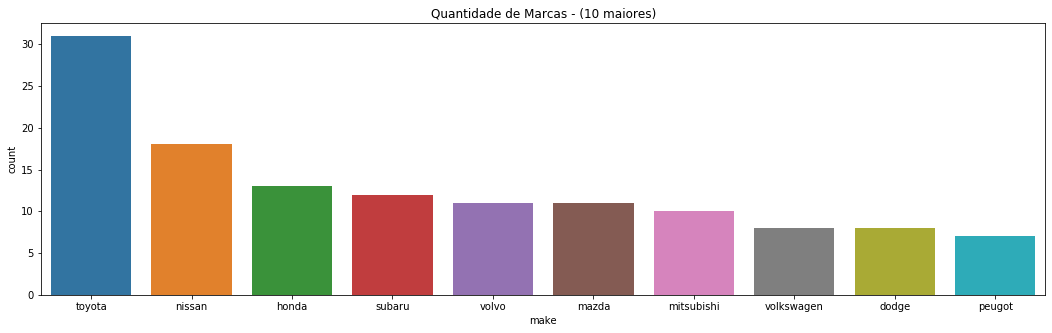

In [22]:
plt.figure(figsize=(18,5))
fig = sns.countplot(x= df['make'],
                    label = 'Quantidade',
                    order = df['make']
                    .value_counts(ascending = False)
                    .index[:10]) \
                    .set_title('Quantidade de Marcas - (10 maiores)')

**No histograma abaixo, podemos ver que a maioria dos carros possuem cumprimento entre 170 a 180**

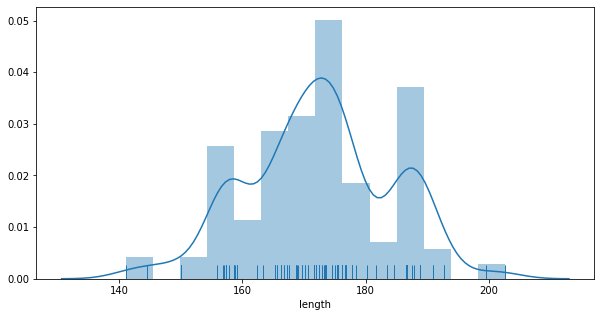

In [23]:
plt.figure(figsize=(10,5))
fig = sns.distplot(df['length'], rug=True)

**Podemos ver no gráfico abaixo que a maioria dos veículos `turbo`são a diesel.**

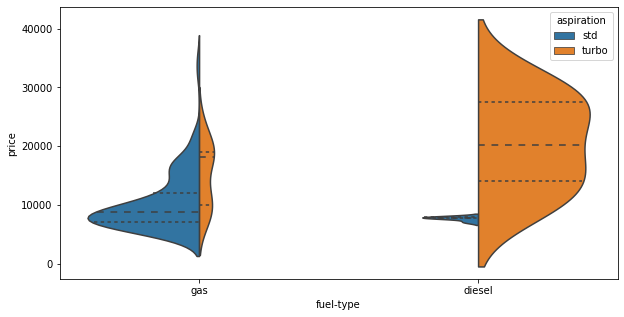

In [24]:
plt.figure(figsize=(10,5))
ax = sns.violinplot(x="fuel-type",
                    y="price",
                    hue="aspiration",
                    data=df,
                    split=True,
                    scale="count",
                    inner="quartile")

In [25]:
df2 = df[['price','body-style']]
df3 = df2.groupby(['body-style'], as_index=False).mean()

In [26]:
df3

,body-style,price
0,convertible,26362.500000
1,hardtop,13142.400000
2,hatchback,9220.160714
3,sedan,12558.620253
4,wagon,11351.411765


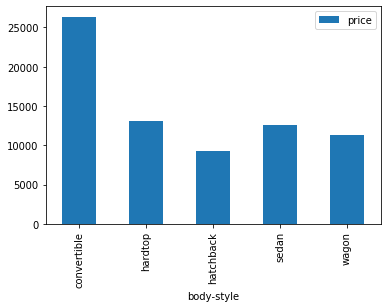

In [27]:
df3.plot.bar(x='body-style',
             y='price');

**Como podemos visualizar no gráfico de dispersão abaixo, existe uma relação clara entre o tamanho do motor e o preço do veículo**

Quanto maior o motor, mais caro é o veículo.

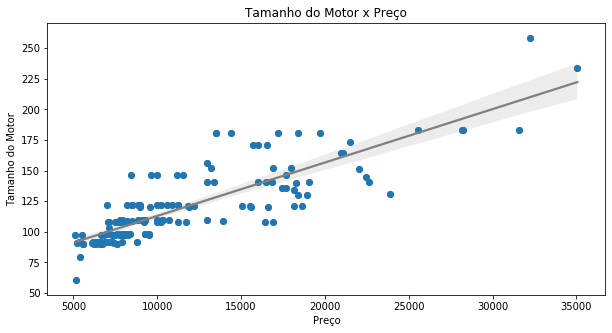

In [28]:
plt.figure(figsize=(10,5))
sns.regplot(x='price', y='engine-size', data=df, color='gray', marker='o') # Plota a linha de regressão

y=df["engine-size"]
x=df["price"]
plt.scatter(x,y)
plt.title("Tamanho do Motor x Preço")
plt.xlabel("Preço")
plt.ylabel("Tamanho do Motor")
plt.show()

**Como podemos visualizar no gráfico de dispersão abaixo, existe uma relação clara entre o preço do automóvel e seu consumo**

Quanto menor o consumo, mais caro é o veículo.

Ou seja, veículos mais econômicos tendem a serem mais caros.

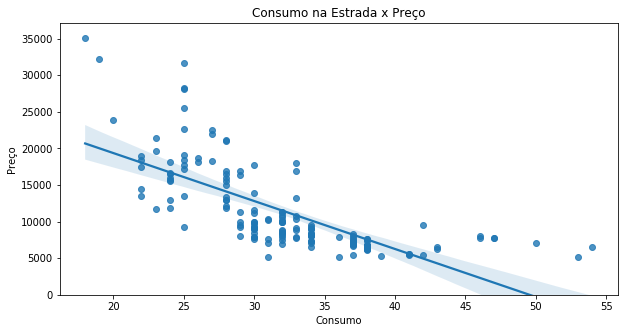

In [29]:
plt.figure(figsize=(10,5))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.title("Consumo na Estrada x Preço")
plt.xlabel("Consumo")
plt.ylabel("Preço")
plt.ylim(0,)
plt.show()

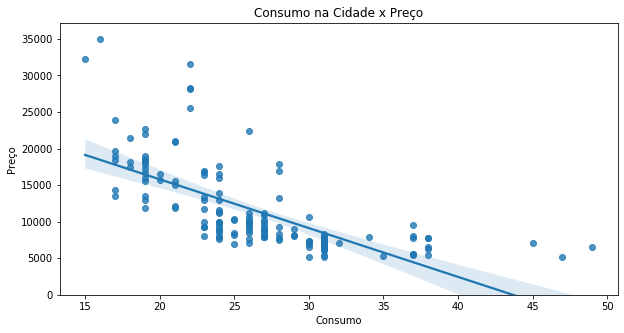

In [30]:
plt.figure(figsize=(10,5))
sns.regplot(x='city-mpg', y='price', data=df)
plt.title("Consumo na Cidade x Preço")
plt.xlabel("Consumo")
plt.ylabel("Preço")
plt.ylim(0,)
plt.show()

**Como podemos ver abaixo, veículos `turbo` possuem menor autonomia, ou seja, consomem mais combustível.**

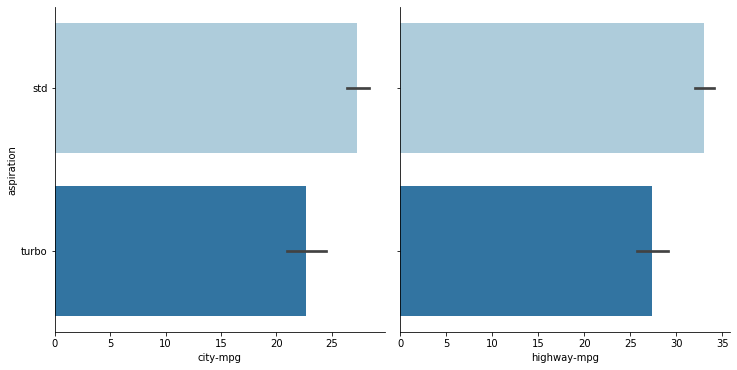

In [31]:
a = sns.PairGrid(df, x_vars=["city-mpg","highway-mpg"], y_vars=["aspiration"], height=5)
a = a.map(sns.barplot, palette='Paired')
plt.show()

## Visualizando o Preço Médio por Fabricante

Como é de se esperar, veículos de marcas populares costuma ser mais baratos, já os veículos de luxo são mais caros. Portanto os valores de nosso conjunto de dados mostra coerência.

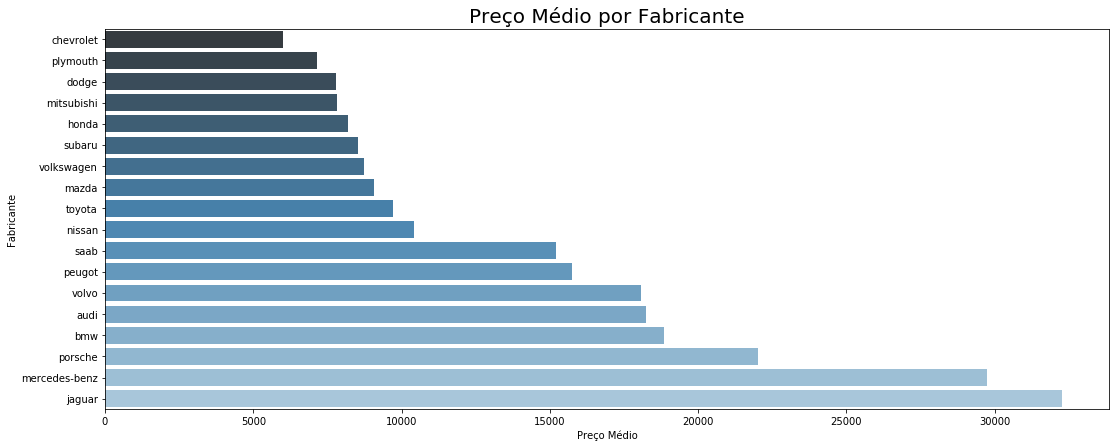

In [32]:
plt.figure(figsize=(18,7))

# Preço médio por fabricante
preco = pd.pivot_table(df,
                       values='price',
                       index='make',
                       aggfunc=np.mean)

# Ordenando os valores pelo preço
preco = preco.sort_values(by='price', ascending=True)

# Resetando o índice
preco = preco.reset_index()

sns.barplot(data=preco,
            y='make',
            x='price',
            palette = 'Blues_d')
plt.title('Preço Médio por Fabricante', fontsize=20)
plt.xlabel('Preço Médio')
plt.ylabel('Fabricante')
plt.show()

**Como podemos visualizar nos gráficos abaixo, diversos outros fatores influenciam no preço do automóvel.**

<Figure size 1296x504 with 0 Axes>

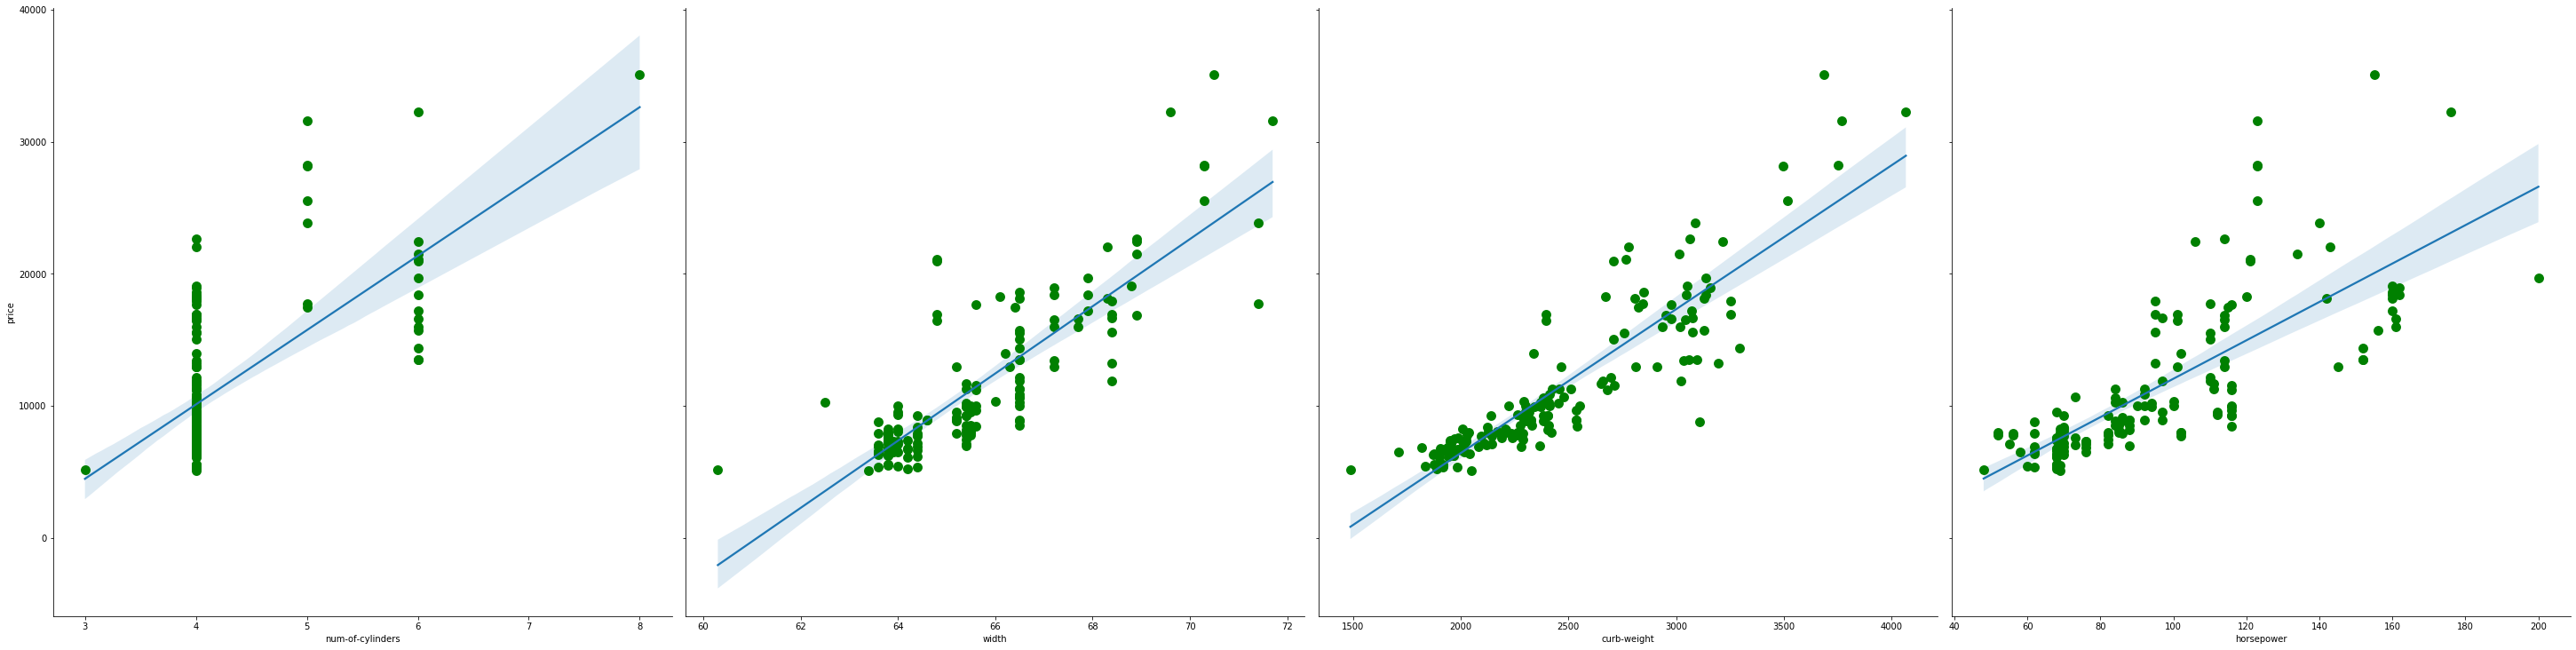

In [33]:
plt.figure(figsize=(18,7))
a = sns.PairGrid(df, x_vars=["num-of-cylinders", "width", "curb-weight", "horsepower"], y_vars=["price"], height=10)
a = a.map(sns.regplot)
a = a.map(plt.scatter, linewidths=2, s=80, color='g')
# a = sns.set(font_scale=2)
plt.show()

### Preços por Tipo de Carroceria

### Qual é mais caro?

Como podemos ver no gráfico abaixo, carros `conversíveis` geralmente são os mais caros, ao passo que carros `hatchback` são mais baratos.

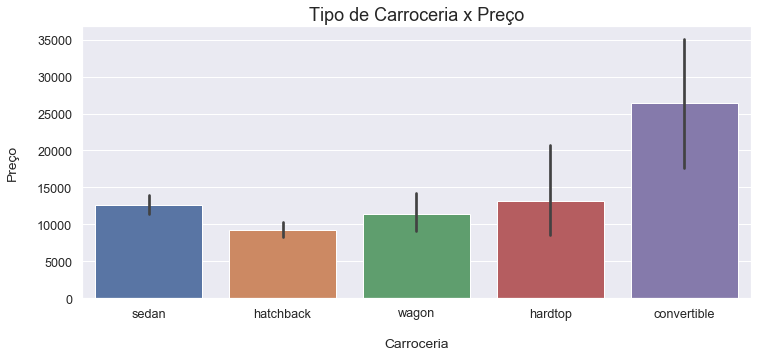

In [34]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.15)
sns.barplot(data=df,
            x='body-style',
            y='price')
plt.xlabel('\nCarroceria')
plt.ylabel('Preço\n')
plt.title('Tipo de Carroceria x Preço', fontsize=18)
plt.show()

## Autonomia

### Quais fabricantes possuem a melhor autonomia?

Como é de se esperar, veículos populares costumam ter melhor autonomia, ao passo que veículos de luxo e/ou esportivos possuem menor autonomia.

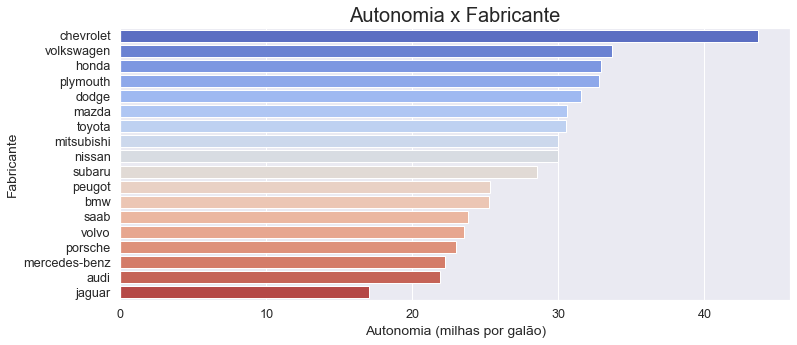

In [35]:
plt.figure(figsize=(12,5))

# Preço médio por fabricante
media = pd.pivot_table(df,
                       values='avg-mpg',
                       index='make')

# Ordenando os valores pelo preço
media = media.sort_values(by='avg-mpg', ascending=False)

media = media.reset_index()

sns.barplot(data=media,
            y='make',
            x='avg-mpg',
            palette = 'coolwarm')
plt.title('Autonomia x Fabricante', fontsize=20)
plt.xlabel('Autonomia (milhas por galão)')
plt.ylabel('Fabricante')
plt.show()

## Informações médias por fabricante

Na tabela abaixo vemos diversas informações, como por exemplo comprimento, largura, altura, peso, número de cilindros, tamanho do motor, autonomia na cidade e na estrada, além do preço médio de cada fabricante.

In [36]:
df.groupby('make').mean().round(2)

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,avg-mpg,price
make,,,,,,,,,,,,,,
audi,1.50,102.70,184.65,68.85,55.05,2772.75,4.75,128.00,8.70,116.75,19.50,24.25,21.88,18246.25
bmw,0.50,101.20,176.80,64.80,54.30,2566.25,5.00,136.00,8.90,111.00,22.00,28.50,25.25,18857.50
chevrolet,1.00,92.47,151.93,62.50,52.40,1757.00,3.67,80.33,9.57,62.67,41.00,46.33,43.67,6007.00
dodge,1.00,95.18,161.45,64.21,51.78,2146.38,4.00,103.25,8.76,84.38,28.50,34.62,31.56,7790.12
honda,0.62,94.33,160.77,64.38,53.24,2096.77,4.00,99.31,9.22,80.23,30.38,35.46,32.92,8184.69
jaguar,0.00,113.00,199.60,69.60,52.80,4066.00,6.00,258.00,8.10,176.00,15.00,19.00,17.00,32250.00
mazda,0.64,96.76,170.45,65.42,54.44,2206.82,4.00,109.55,8.73,80.00,27.55,33.64,30.59,9080.00
mercedes-benz,0.00,107.78,190.44,70.62,55.44,3643.00,5.60,193.20,18.86,129.40,20.80,23.60,22.20,29726.40
mitsubishi,1.50,95.19,166.48,64.94,50.84,2228.50,4.00,107.00,8.38,91.80,26.70,33.30,30.00,7813.00
